# Measure transmission for multiple tip/sample and in/out ports

in/out from Cryo wiring layout.pptx

In [1]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import mw_transmission_optimization as mto
from scipy.interpolate import interp1d

In [2]:
FOLDER_PATH = os.path.join("Z:\\", "Data", "20211116_MW_cabling_testing")

In [37]:
basename = "20211116_NetworkAnalysis_"

sample_labels = [
    "SampleOut_UpperPin.csv", 
    "SampleIn_UpperPin.csv", 
    "SampleIn_LowerPin.csv", 
    "SampleOut_LowerPin.csv"
]
tip_labels = [
    "TipIn_LowerPin.csv",
    "TipOut_LowerPin.csv",
    "TipIn_UpperPin.csv", 
    "TipOut_UpperPin.csv", 
]

In [44]:
FILE_PATH = os.path.join(FOLDER_PATH, basename + sample_labels[1])
print(FILE_PATH)

Z:\Data\20211116_MW_cabling_testing\20211116_NetworkAnalysis_SampleIn_UpperPin.csv


In [45]:
zvl = mto.RohdeSchwarzZVL('TCPIP::192.168.0.18::INSTR')
frequency, power = zvl.get_trace(points=4000)
mto.save_trace(frequency, power, FILE_PATH)

Success! Connected to Rohde&Schwarz,ZVL-6,1303.6509K06/101534,3.32
Measuring trace...
Trace saved to Z:\Data\20211116_MW_cabling_testing\20211116_NetworkAnalysis_SampleIn_UpperPin.csv


<IPython.core.display.Javascript object>


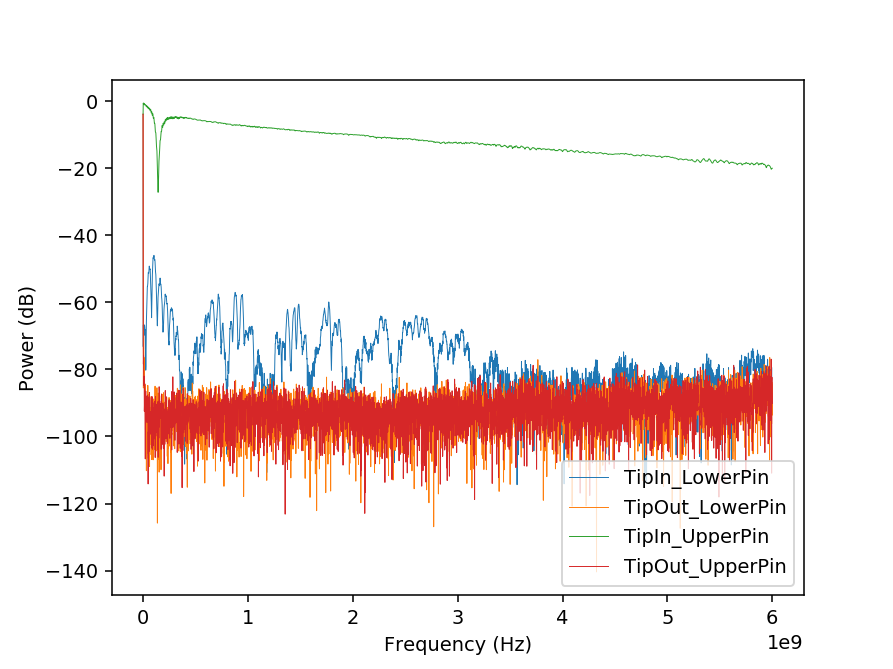

In [52]:
%matplotlib notebook
fig, ax = plt.subplots()

for tip_label in tip_labels:
    try:
        FILE_PATH = os.path.join(FOLDER_PATH, basename + tip_label)
        freq, power = mto.load_trace(FILE_PATH)
        ax.plot(frequency, power, label=tip_label[:-4], linewidth=0.5)
    except FileNotFoundError:
        pass

ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Power (dB)")

ax.legend()
#fig.savefig(FOLDER_PATH + "\Tip_MW_Pin_comparision.png", dpi=600)

<IPython.core.display.Javascript object>


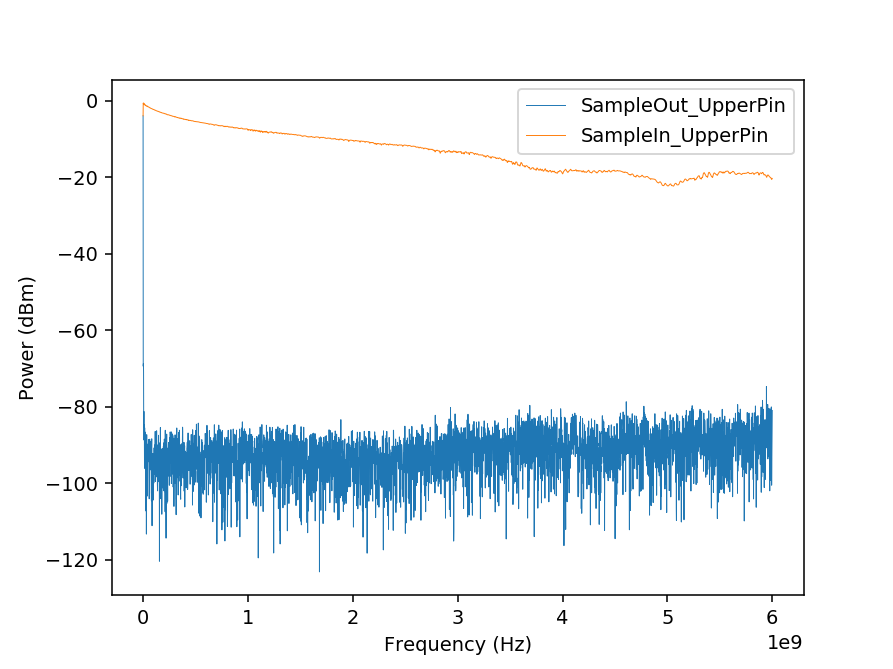

In [53]:
fig, ax = plt.subplots()

for sample_label in sample_labels:
    try:
        FILE_PATH = os.path.join(FOLDER_PATH, basename + sample_label)
        freq, power = mto.load_trace(FILE_PATH)
        ax.plot(frequency, power, label=sample_label[:-4], linewidth=0.5)
    except FileNotFoundError:
        pass

ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Power (dBm)")

ax.legend()
fig.savefig(FOLDER_PATH + "\Sample_MW_Pin_comparision.png", dpi=600)

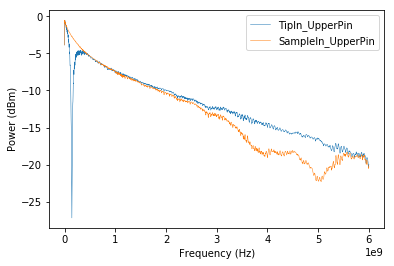

In [50]:
files = ["TipIn_UpperPin.csv", "SampleIn_UpperPin.csv"]
fig, ax = plt.subplots()

for file in files:
    FILE_PATH = os.path.join(FOLDER_PATH, basename + file)
    freq, power = mto.load_trace(FILE_PATH)
    ax.plot(frequency, power, label=file[:-4], linewidth=0.5)
    
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Power (dBm)")

ax.legend()
fig.savefig(FOLDER_PATH + "\Tip_Sample_MW_Pin_comparision.png", dpi=600)